*Eduardus Tjitrahardja | @edutjie | 2022*

# Logistic Regression

## Import Libraries

In [573]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Set SNS Style

In [574]:
sns.set_style('darkgrid')
sns.set(color_codes=True)

## Load Dataset

In [575]:
df = pd.read_csv('../data/banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [576]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [577]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp_var_rate      False
cons_price_idx    False
cons_conf_idx     False
euribor3m         False
nr_employed       False
y                 False
dtype: bool

## EDA

In [578]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


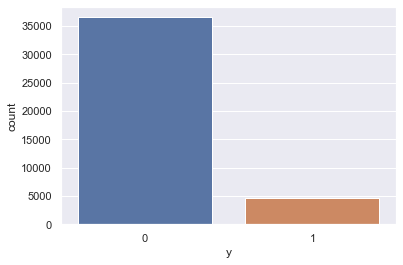

In [579]:
sns.countplot(x='y', data=df)
plt.show()

The dataset is uneven

### Balancing Dataset

In [580]:
# balanced_df = pd.concat([df[df.y == 1], df[df.y == 0].sample(n=df[df.y == 1].shape[0], random_state=1)], axis=0)
balanced_df = df

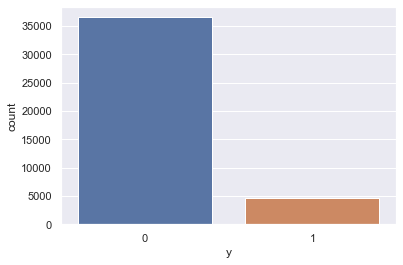

In [581]:
sns.countplot(x='y', data=balanced_df)
plt.show()

In [582]:
balanced_df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


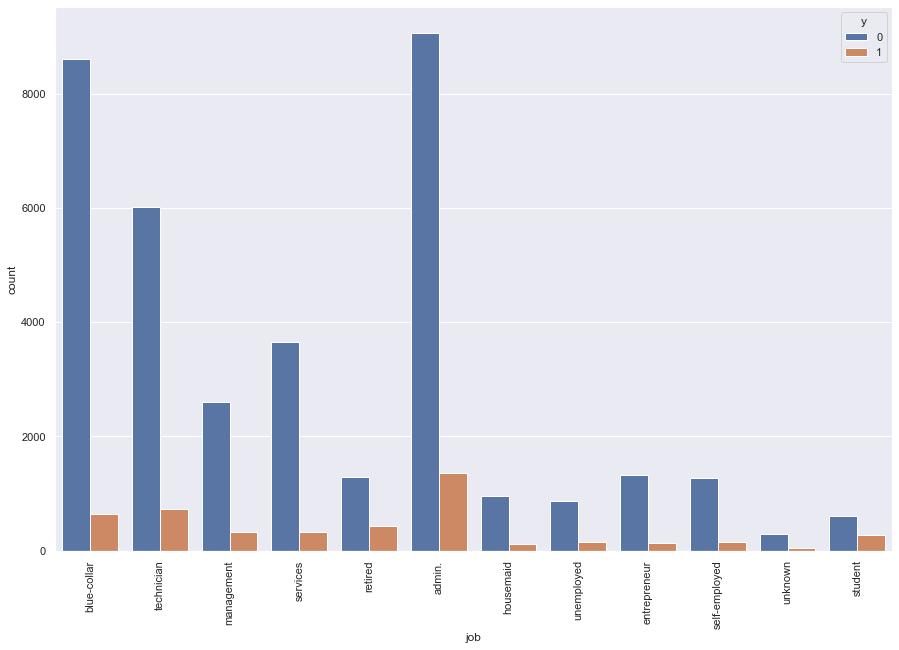

In [583]:
plt.figure(figsize=(15, 10))
sns.countplot(x='job', data=balanced_df, hue='y')
plt.xticks(rotation=90) # rotate xticks
plt.show()

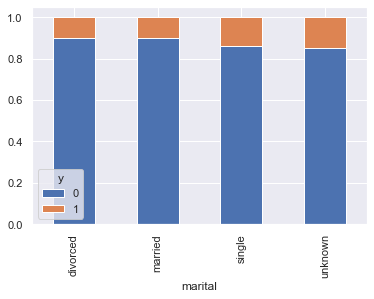

In [584]:
marital_tab = pd.crosstab(balanced_df.marital, balanced_df.y)
marital_tab.div(marital_tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

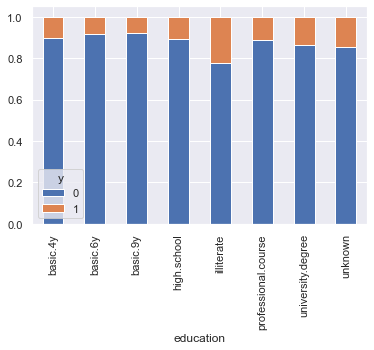

In [585]:
edu_tab = pd.crosstab(balanced_df.education, balanced_df.y)
edu_tab.div(edu_tab.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.show()

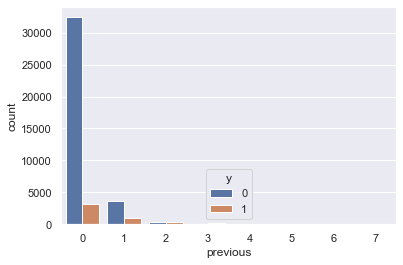

In [586]:
sns.countplot(x='previous', data=balanced_df, hue='y')
plt.show()

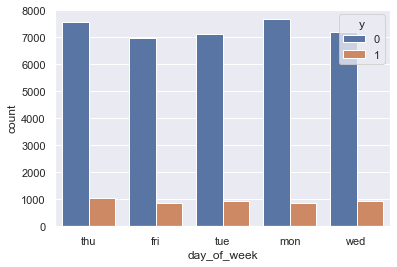

In [587]:
sns.countplot(x='day_of_week', data=balanced_df, hue='y')
plt.show()

every is almost the same, let's drop it 

In [588]:
# balanced_df.drop(['day_of_week'], axis=1, inplace=True)

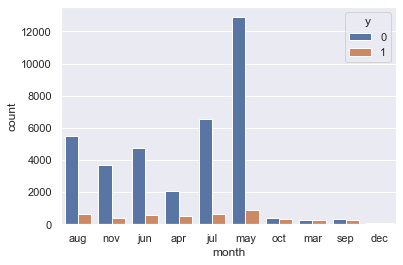

In [589]:
sns.countplot(x='month', data=balanced_df, hue='y')
plt.show()

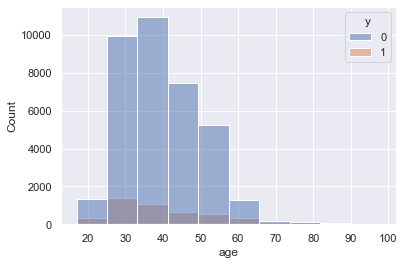

In [590]:
sns.histplot(x='age', data=balanced_df, hue='y', bins=10)
plt.show()

<AxesSubplot:xlabel='poutcome', ylabel='count'>

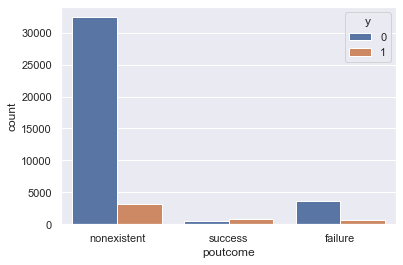

In [591]:
sns.countplot(x='poutcome', data=balanced_df, hue='y')

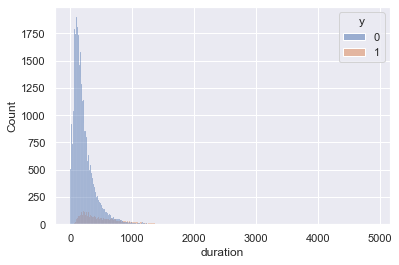

In [592]:
sns.histplot(x='duration', data=balanced_df, hue='y')
plt.show()

## Data Preprocessing

In [593]:
cat_cols = balanced_df.select_dtypes(include=['object']).columns.to_list()
num_cols = balanced_df.select_dtypes(include=['int64', 'float64']).columns.to_list()
num_cols.remove('y')

print(cat_cols)
print(num_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


### Observe Categorical Columns

In [594]:
balanced_df[cat_cols].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


In [595]:
for col in cat_cols:
    print(col + ": ", end="")
    print(df[col].unique())

job: ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
default: ['unknown' 'no' 'yes']
housing: ['yes' 'no' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['cellular' 'telephone']
month: ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
day_of_week: ['thu' 'fri' 'tue' 'mon' 'wed']
poutcome: ['nonexistent' 'success' 'failure']


#### One Hot Encode Categorical Columns

In [596]:
for col in cat_cols:
    dummies = pd.get_dummies(balanced_df[col], prefix=col)
    balanced_df = pd.concat([balanced_df, dummies], axis=1)
    balanced_df.drop([col], axis=1, inplace=True)
balanced_df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [597]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

### Observe Numerical Columns

In [598]:
balanced_df[num_cols].describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Standard Scale Numerical Columns

In [599]:
from sklearn.preprocessing import StandardScaler

In [600]:
ss = StandardScaler()

In [601]:
scaled_df = pd.DataFrame(ss.fit_transform(balanced_df[num_cols]), columns=num_cols, index=balanced_df.index)
scaled_df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,0.381527,-0.186230,-0.565922,0.195414,-0.349494,0.839061,-0.227465,0.951267,0.773575,0.845170
1,1.245157,-0.463926,-0.565922,0.195414,-0.349494,-0.115781,-0.649003,-0.323542,0.230456,0.398115
2,-1.153816,0.311309,0.156105,-5.117342,3.691766,-1.134279,0.828107,0.151810,-1.667578,-2.428157
3,-0.098268,-0.282652,-0.204909,0.195414,-0.349494,-1.197935,-0.864955,-1.425496,-1.277824,-0.940281
4,1.437075,-0.467783,-0.565922,-5.133393,1.671136,-1.898153,-2.374889,1.966794,-1.586859,-1.257233


In [602]:
balanced_df.drop(num_cols, axis=1, inplace=True)
balanced_df = pd.concat([balanced_df, scaled_df], axis=1)
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   y                              41188 non-null  int64  
 1   job_admin.                     41188 non-null  uint8  
 2   job_blue-collar                41188 non-null  uint8  
 3   job_entrepreneur               41188 non-null  uint8  
 4   job_housemaid                  41188 non-null  uint8  
 5   job_management                 41188 non-null  uint8  
 6   job_retired                    41188 non-null  uint8  
 7   job_self-employed              41188 non-null  uint8  
 8   job_services                   41188 non-null  uint8  
 9   job_student                    41188 non-null  uint8  
 10  job_technician                 41188 non-null  uint8  
 11  job_unemployed                 41188 non-null  uint8  
 12  job_unknown                    41188 non-null 

## Split Dataset

In [603]:
from sklearn.model_selection import train_test_split

In [604]:
X = balanced_df.drop('y', axis=1)
y = balanced_df['y']
X.shape, y.shape

((41188, 63), (41188,))

In [605]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28831, 63), (12357, 63), (28831,), (12357,))

In [606]:
# X_train = preprocessing.scale(X_train)
# X_test = preprocessing.scale(X_test)

## Model Data

In [607]:
from sklearn.linear_model import LogisticRegression

In [608]:
logreg = LogisticRegression(max_iter=1000)

In [609]:
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.90928218823339

In [610]:
y_test_preds = logreg.predict(X_test)
print(y_test_preds)

[0 0 0 ... 0 0 0]


In [611]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_preds)

0.90928218823339